In [3]:
from ultralytics import YOLO

import sys
import os
import glob
import random
import time

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid import ImageGrid

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# pip install ultralytics

In [5]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-light.mplstyle')
# plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')

plt.rcParams.update({
        'axes.labelsize': 21, # названия осей
        'xtick.labelsize': 16, # значения осей
        'ytick.labelsize': 16, # значения осей
        'legend.fontsize': 16,
        'axes.titlesize': 16,
    })


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm_gui
from torchvision import datasets, transforms
from PIL import Image
from torchvision.models import resnet18, vit_b_32, vit_l_16




In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET

In [8]:
import kagglehub

path = kagglehub.dataset_download("chitholian/annotated-potholes-dataset")
print("Path to dataset files:", path)


100%|██████████| 45.9M/45.9M [00:00<00:00, 198MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chitholian/annotated-potholes-dataset/versions/1


In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

original_path = r"/root/.cache/kagglehub/datasets/chitholian/annotated-potholes-dataset/versions/1//annotated-images"


dataset_path = r"/root/.cache/pothole_yolo_dataset"

In [10]:
ls

sample_data/


In [11]:

for split in ['train', 'val']:
    os.makedirs(os.path.join(dataset_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'labels', split), exist_ok=True)

In [12]:
print(os.listdir(original_path))


['img-152.jpg', 'img-544.jpg', 'img-562.xml', 'img-27.xml', 'img-558.xml', 'img-232.xml', 'img-360.xml', 'img-4.xml', 'img-608.jpg', 'img-63.jpg', 'img-1.xml', 'img-471.jpg', 'img-546.xml', 'img-143.jpg', 'img-373.jpg', 'img-542.xml', 'img-95.xml', 'img-44.xml', 'img-532.jpg', 'img-285.xml', 'img-359.jpg', 'img-20.jpg', 'img-576.jpg', 'img-493.xml', 'img-24.xml', 'img-57.jpg', 'img-499.jpg', 'img-399.jpg', 'img-263.jpg', 'img-465.xml', 'img-641.xml', 'img-258.jpg', 'img-530.jpg', 'img-105.xml', 'img-566.jpg', 'img-244.xml', 'img-192.jpg', 'img-534.jpg', 'img-516.jpg', 'img-566.xml', 'img-57.xml', 'img-2.xml', 'img-389.jpg', 'img-235.jpg', 'img-309.xml', 'img-145.xml', 'img-88.xml', 'img-524.xml', 'img-608.xml', 'img-155.xml', 'img-550.xml', 'img-246.jpg', 'img-207.xml', 'img-150.xml', 'img-542.jpg', 'img-378.xml', 'img-49.xml', 'img-391.jpg', 'img-136.xml', 'img-394.xml', 'img-201.xml', 'img-407.xml', 'img-74.jpg', 'img-372.xml', 'img-59.xml', 'img-574.jpg', 'img-415.xml', 'img-52.jpg'

In [13]:
dataset_path

'/root/.cache/pothole_yolo_dataset'

In [14]:
all_images = [f for f in os.listdir(original_path) if f.lower().endswith('.jpg')]


train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

splits = {
    'train': train_imgs,
    'val': val_imgs
}


In [15]:
def convert_xml_to_yolo(xml_file, img_width, img_height):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    yolo_labels = []
    for obj in root.findall('object'):
        cls_name = obj.find('name').text.lower()
        cls_id = 0

        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)

        x_center = (xmin + xmax) / 2.0 / img_width
        y_center = (ymin + ymax) / 2.0 / img_height
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        yolo_labels.append(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_labels

In [16]:
or split, images in splits.items():
    for img_file in images:
        src_img_path = os.path.join(original_path, img_file)
        dst_img_path = os.path.join(dataset_path, 'images', split, img_file)

        shutil.copy2(src_img_path, dst_img_path)

        xml_file = img_file.replace('.jpg', '.xml')
        xml_path = os.path.join(original_path, xml_file)

        if os.path.exists(xml_path):
            from PIL import Image
            with Image.open(src_img_path) as img:
                width, height = img.size

            yolo_labels = convert_xml_to_yolo(xml_path, width, height)

            txt_file = os.path.join(dataset_path, 'labels', split, img_file.replace('.jpg', '.txt'))
            with open(txt_file, 'w') as f:
                f.write('\n'.join(yolo_labels))
        else:
            print(f"Warning: No annotation found for {img_file}")

print("✅ Датасет успешно подготовлен!")

✅ Датасет успешно подготовлен!


In [17]:
dataset_dir = "/root/.cache/pothole_yolo_dataset"
os.makedirs(dataset_dir, exist_ok=True)

yaml_content = """
path: /root/.cache/pothole_yolo_dataset
train: images/train
val: images/val
names:
  0: pothole
"""

yaml_path = os.path.join(dataset_dir, "dataset.yaml")

with open(yaml_path, "w") as f:
    f.write(yaml_content.strip())

print(f"✅ dataset.yaml успешно создан по пути: {yaml_path}")

✅ dataset.yaml успешно создан по пути: /root/.cache/pothole_yolo_dataset/dataset.yaml


In [18]:
from ultralytics import YOLO

# Загружаем модель YOLOv8n (у меня не полуилось установить ultralytics==8.0.1 потому что ошибки с несовместимостью падают :(((
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 126MB/s]


In [26]:
results = model.train(
    data=yaml_path,
    epochs=20,
    imgsz=512,
    batch=16,
    name='yolov8n-pothole',
    project='runs/train'
)

print("✅ Обучение завершено!")

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=runs/train/yolov8n-pothole/weights/best.pt, data=/root/.cache/pothole_yolo_dataset/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=yolov8n-pothole4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

train: Scanning /root/.cache/pothole_yolo_dataset/labels/train.cache... 532 images, 0 backgrounds, 0 corrupt: 100%|██████████| 532/532 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /root/.cache/pothole_yolo_dataset/labels/val.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]

Plotting labels to runs/train/yolov8n-pothole4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/train/yolov8n-pothole4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.832      3.224      2.383         15        512: 100%|██████████| 34/34 [04:35<00:00,  8.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.09s/it]

                   all        133        320      0.189    0.00313    0.00923    0.00447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.983      2.138      1.699         12        512: 100%|██████████| 34/34 [04:32<00:00,  8.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.65s/it]

                   all        133        320      0.246      0.287      0.187     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.725      1.806      1.492         10        512: 100%|██████████| 34/34 [04:33<00:00,  8.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:26<00:00,  5.22s/it]

                   all        133        320      0.507      0.525      0.486      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.613      1.603      1.405         22        512: 100%|██████████| 34/34 [04:33<00:00,  8.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:26<00:00,  5.21s/it]

                   all        133        320      0.593      0.541      0.558      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.561      1.569      1.383         16        512: 100%|██████████| 34/34 [04:34<00:00,  8.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.07s/it]

                   all        133        320      0.726      0.556       0.64      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.478      1.426      1.313         11        512: 100%|██████████| 34/34 [04:33<00:00,  8.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.05s/it]

                   all        133        320      0.652      0.537      0.586      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.449      1.408      1.308         17        512: 100%|██████████| 34/34 [04:33<00:00,  8.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.02s/it]

                   all        133        320      0.704      0.594      0.639      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.452      1.362      1.304         16        512: 100%|██████████| 34/34 [04:34<00:00,  8.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.00s/it]

                   all        133        320      0.615      0.628      0.652       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.428      1.293      1.283         14        512: 100%|██████████| 34/34 [04:35<00:00,  8.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.12s/it]

                   all        133        320      0.735      0.625      0.716      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.389      1.252      1.248         18        512: 100%|██████████| 34/34 [04:33<00:00,  8.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.00s/it]

                   all        133        320      0.763      0.619      0.715       0.42


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.296      1.329      1.196         14        512: 100%|██████████| 34/34 [04:31<00:00,  7.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.97s/it]

                   all        133        320      0.733      0.602      0.696       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.246      1.209      1.171         16        512: 100%|██████████| 34/34 [04:30<00:00,  7.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.02s/it]

                   all        133        320      0.719      0.578      0.705      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.253      1.182      1.163          9        512: 100%|██████████| 34/34 [04:31<00:00,  7.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.98s/it]

                   all        133        320      0.759       0.65      0.727      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.222      1.124      1.161          6        512: 100%|██████████| 34/34 [04:30<00:00,  7.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.99s/it]

                   all        133        320      0.763      0.653      0.726      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.202      1.051      1.139          8        512: 100%|██████████| 34/34 [04:29<00:00,  7.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  5.00s/it]

                   all        133        320      0.832      0.625      0.755      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G       1.17      1.035      1.125         13        512: 100%|██████████| 34/34 [04:29<00:00,  7.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.98s/it]

                   all        133        320      0.839      0.619      0.748      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.175      1.011      1.134         11        512: 100%|██████████| 34/34 [04:27<00:00,  7.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.99s/it]

                   all        133        320      0.769      0.644      0.742      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.135     0.9726      1.109          8        512: 100%|██████████| 34/34 [04:28<00:00,  7.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.99s/it]

                   all        133        320      0.802      0.637      0.752      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.147      0.986      1.112         13        512: 100%|██████████| 34/34 [04:27<00:00,  7.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.98s/it]

                   all        133        320      0.785      0.661      0.759      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G       1.13     0.9661        1.1         12        512: 100%|██████████| 34/34 [04:27<00:00,  7.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.97s/it]

                   all        133        320      0.785      0.669      0.762      0.469



20 epochs completed in 1.655 hours.
Optimizer stripped from runs/train/yolov8n-pothole4/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/yolov8n-pothole4/weights/best.pt, 6.2MB

Validating runs/train/yolov8n-pothole4/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<00:00,  4.40s/it]


                   all        133        320      0.785      0.669      0.762      0.469
Speed: 5.3ms preprocess, 146.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/train/yolov8n-pothole4
✅ Обучение завершено!


In [32]:
from ultralytics import YOLO

model = YOLO('runs/train/yolov8n-pothole/weights/best.pt')

results = model.predict(source='/root/.cache/pothole_yolo_dataset/images/val', save=True, conf=0.02)

print("✅ Предсказания сделаны и сохранены!")



image 1/133 /root/.cache/pothole_yolo_dataset/images/val/img-116.jpg: 64x64 1 pothole, 10.7ms
image 2/133 /root/.cache/pothole_yolo_dataset/images/val/img-117.jpg: 64x64 (no detections), 10.3ms
image 3/133 /root/.cache/pothole_yolo_dataset/images/val/img-124.jpg: 64x64 1 pothole, 10.3ms
image 4/133 /root/.cache/pothole_yolo_dataset/images/val/img-132.jpg: 64x64 (no detections), 10.2ms
image 5/133 /root/.cache/pothole_yolo_dataset/images/val/img-147.jpg: 64x64 (no detections), 10.5ms
image 6/133 /root/.cache/pothole_yolo_dataset/images/val/img-158.jpg: 64x64 (no detections), 11.0ms
image 7/133 /root/.cache/pothole_yolo_dataset/images/val/img-166.jpg: 64x64 (no detections), 11.6ms
image 8/133 /root/.cache/pothole_yolo_dataset/images/val/img-176.jpg: 64x64 1 pothole, 10.2ms
image 9/133 /root/.cache/pothole_yolo_dataset/images/val/img-177.jpg: 64x64 1 pothole, 10.3ms
image 10/133 /root/.cache/pothole_yolo_dataset/images/val/img-186.jpg: 64x64 1 pothole, 11.0ms
image 11/133 /root/.cache/po

Улучшение бейзлайна

In [33]:
results = model.train(
    data=yaml_path,
    epochs=10,
    imgsz=640,
    batch=16,
    name='yolov8n-pothole-augmented',
    project='runs/train',
    augment=True,
    mosaic=1.0,
    mixup=0.5,
    hsv_h=0.015,
    scale=0.5,
    flipud=0.5,
    fliplr=0.5
)


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=runs/train/yolov8n-pothole/weights/best.pt, data=/root/.cache/pothole_yolo_dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=yolov8n-pothole-augmented, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

train: Scanning /root/.cache/pothole_yolo_dataset/labels/train.cache... 532 images, 0 backgrounds, 0 corrupt: 100%|██████████| 532/532 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /root/.cache/pothole_yolo_dataset/labels/val.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]

Plotting labels to runs/train/yolov8n-pothole-augmented/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/train/yolov8n-pothole-augmented
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.811        4.5       2.51          7        640: 100%|██████████| 34/34 [07:01<00:00, 12.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.41s/it]

                   all        133        320      0.321    0.00892    0.00789    0.00298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G       2.01      2.741      1.794         11        640: 100%|██████████| 34/34 [06:55<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:34<00:00,  6.84s/it]

                   all        133        320      0.336      0.163      0.142     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.771      2.296       1.61         14        640: 100%|██████████| 34/34 [06:48<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.62s/it]

                   all        133        320      0.414      0.353      0.322      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.647      2.052      1.494          9        640: 100%|██████████| 34/34 [06:43<00:00, 11.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.40s/it]

                   all        133        320       0.48      0.506       0.47      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.577      1.877      1.449         10        640: 100%|██████████| 34/34 [06:42<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.30s/it]

                   all        133        320       0.63      0.523      0.564      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.513      1.779      1.402         15        640: 100%|██████████| 34/34 [06:48<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.23s/it]

                   all        133        320      0.569      0.506      0.513      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.464      1.684       1.38         11        640: 100%|██████████| 34/34 [06:46<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.40s/it]

                   all        133        320      0.662      0.506       0.58      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.417      1.602      1.331         16        640: 100%|██████████| 34/34 [06:47<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.13s/it]

                   all        133        320      0.685       0.55      0.612      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.407      1.549      1.325         13        640: 100%|██████████| 34/34 [06:46<00:00, 11.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:32<00:00,  6.59s/it]

                   all        133        320      0.655       0.58      0.641      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.356      1.469      1.301         16        640: 100%|██████████| 34/34 [06:53<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.30s/it]

                   all        133        320      0.668        0.6      0.659      0.403



10 epochs completed in 1.229 hours.
Optimizer stripped from runs/train/yolov8n-pothole-augmented/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/yolov8n-pothole-augmented/weights/best.pt, 6.2MB

Validating runs/train/yolov8n-pothole-augmented/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:09<00:00, 13.94s/it]


                   all        133        320      0.637      0.597      0.659      0.419
Speed: 2.5ms preprocess, 504.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/train/yolov8n-pothole-augmented


In [37]:
from ultralytics import YOLO

model = YOLO('runs/train/yolov8n-pothole-augmented/weights/best.pt')

results = model.predict(source='/root/.cache/pothole_yolo_dataset/images/val', save=True)

print("✅ Предсказания сделаны и сохранены!")



image 1/133 /root/.cache/pothole_yolo_dataset/images/val/img-116.jpg: 640x640 1 pothole, 206.9ms
image 2/133 /root/.cache/pothole_yolo_dataset/images/val/img-117.jpg: 640x640 2 potholes, 202.4ms
image 3/133 /root/.cache/pothole_yolo_dataset/images/val/img-124.jpg: 640x640 1 pothole, 199.4ms
image 4/133 /root/.cache/pothole_yolo_dataset/images/val/img-132.jpg: 640x640 3 potholes, 197.1ms
image 5/133 /root/.cache/pothole_yolo_dataset/images/val/img-147.jpg: 640x640 (no detections), 202.6ms
image 6/133 /root/.cache/pothole_yolo_dataset/images/val/img-158.jpg: 640x640 1 pothole, 200.5ms
image 7/133 /root/.cache/pothole_yolo_dataset/images/val/img-166.jpg: 640x640 2 potholes, 199.7ms
image 8/133 /root/.cache/pothole_yolo_dataset/images/val/img-176.jpg: 640x640 2 potholes, 204.9ms
image 9/133 /root/.cache/pothole_yolo_dataset/images/val/img-177.jpg: 640x640 1 pothole, 200.1ms
image 10/133 /root/.cache/pothole_yolo_dataset/images/val/img-186.jpg: 640x640 2 potholes, 208.6ms
image 11/133 /roo

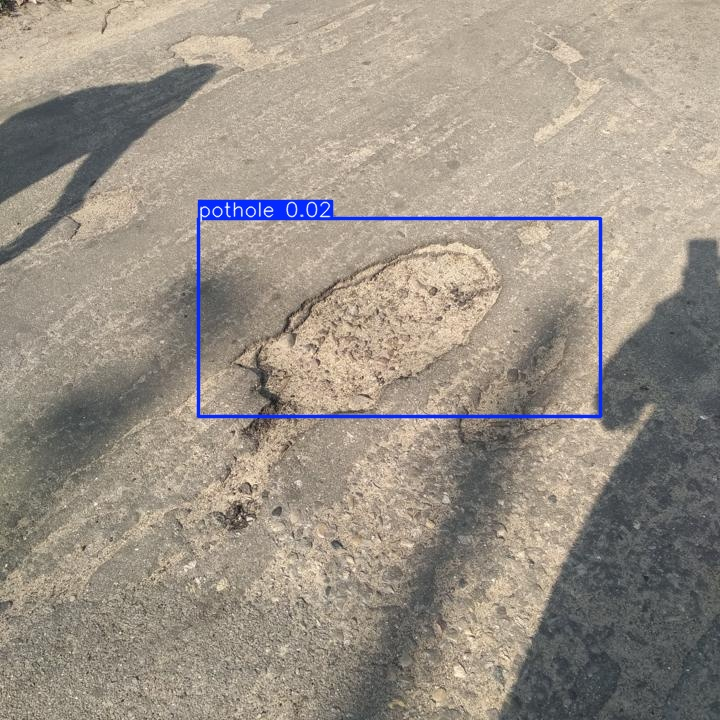

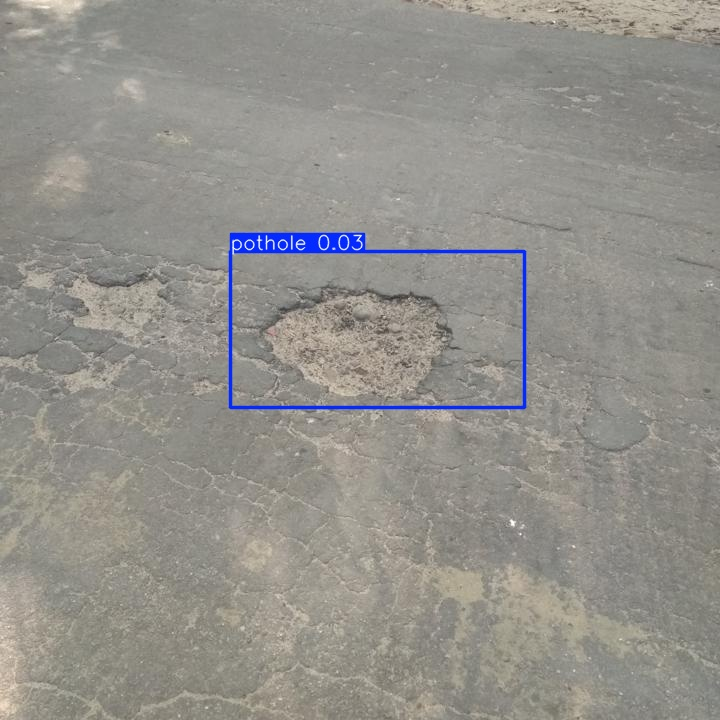

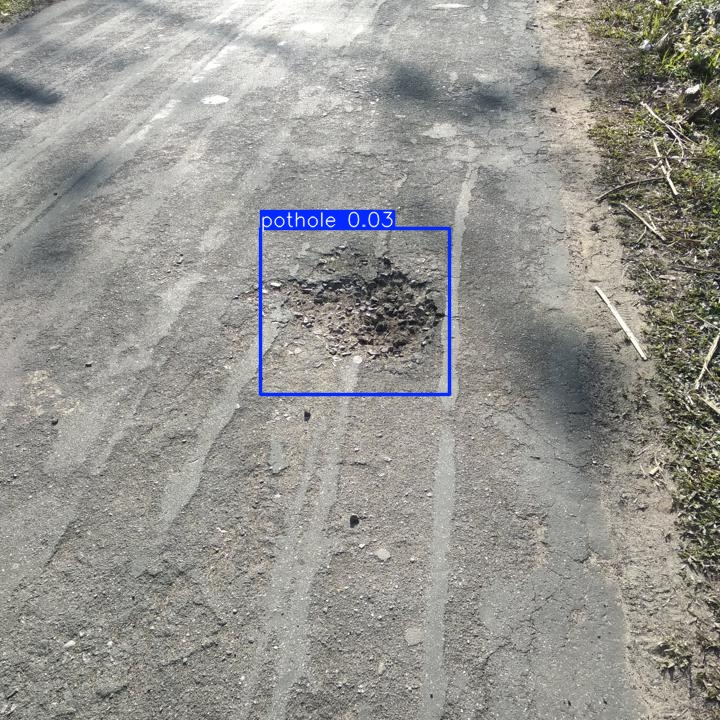

In [41]:
from IPython.display import Image, display

display(Image('/content/runs/detect/predict8/img-124.jpg'))
display(Image('/content/runs/detect/predict8/img-176.jpg'))
display(Image('/content/runs/detect/predict8/img-177.jpg'))

---

Улучшенная модель!

---

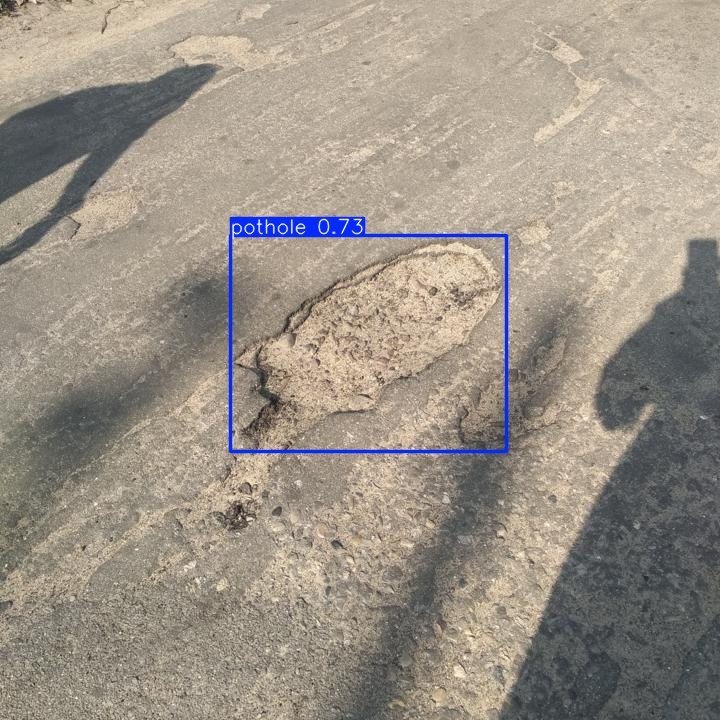

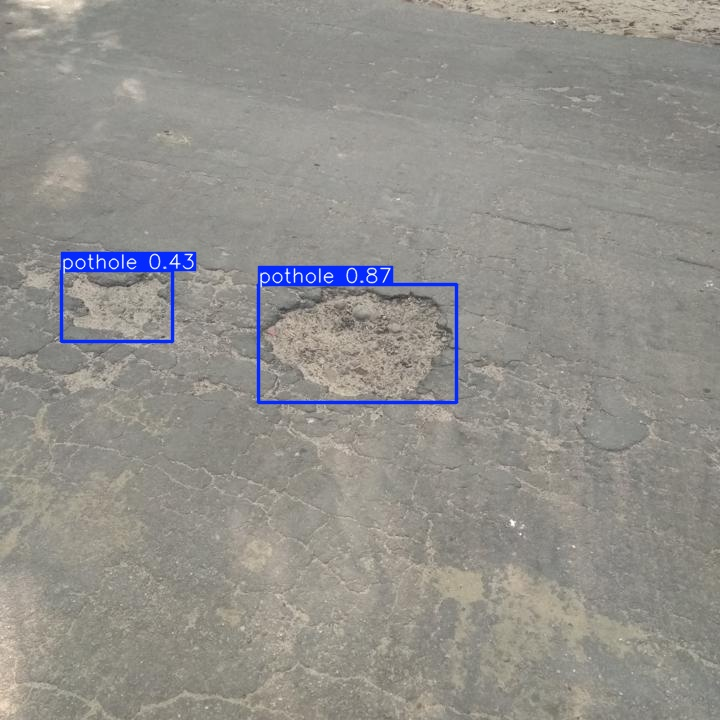

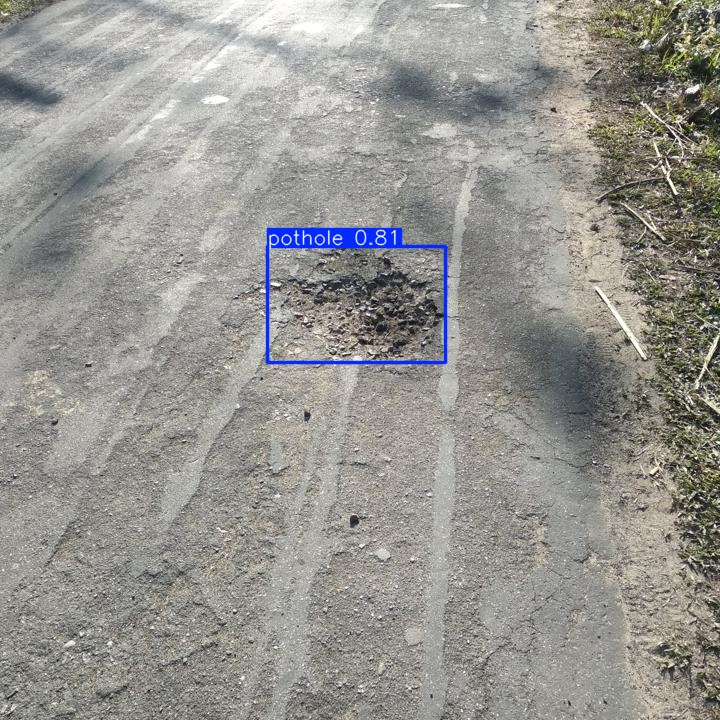

In [42]:
display(Image('/content/runs/detect/predict12/img-124.jpg'))
display(Image('/content/runs/detect/predict12/img-176.jpg'))
display(Image('/content/runs/detect/predict12/img-177.jpg'))

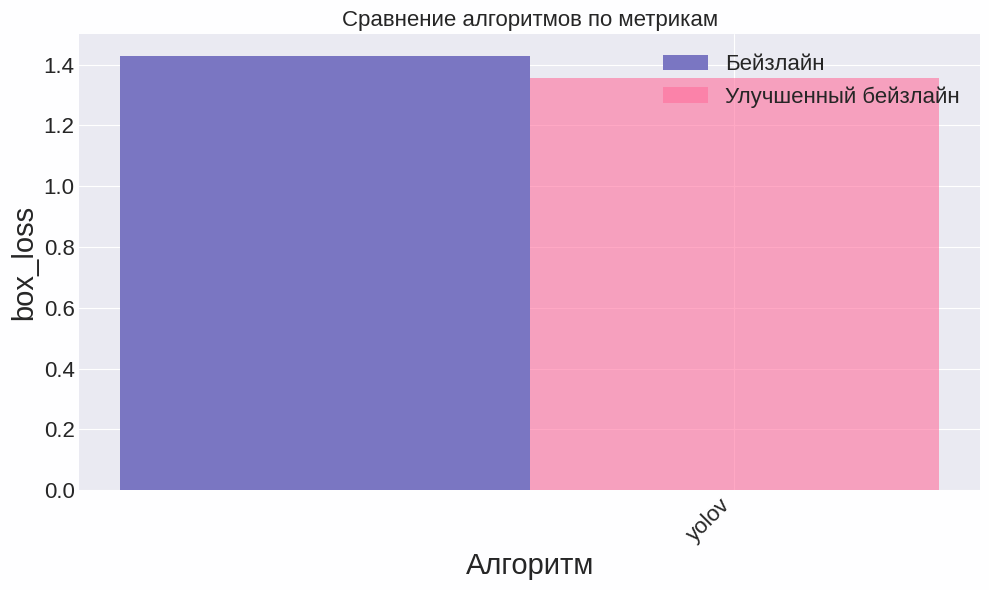

In [39]:

algorithms = [
    "yolov"
]


baseline = [
    1.428
]

improved_baseline = [
    1.356
]


x = np.arange(len(algorithms))
width = 0.1

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, baseline, width, label='Бейзлайн')
rects2 = ax.bar(x, improved_baseline, width, label='Улучшенный бейзлайн')

ax.set_xlabel('Алгоритм')
ax.set_ylabel('box_loss')
ax.set_title('Сравнение алгоритмов по метрикам')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


В итоге получилось сделать предикативную модель для семантической сегментации.

Чтобы улучшить производительность модели, добавил сильные аугментации. По метрики не сказать что модель улучшилась, но по предикту точно. Бейзайнл с маленькой уверенностью персказывает ямы. а вот улучшенна модель вообще супер.
